<a href="https://colab.research.google.com/github/hyonnys/Section2_project/blob/main/%5BS2_project%5DSurvivalRate_after_KidneyTransplant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Section2 / Project


---
## 📊 신장이식 생존율 예측

###📍 **상황설정**<br>
- A병원은 신장 이식환자(수여자)의 생존율을 높이기 위해 노력해왔다. A병원은 이식 기준을 대기명단 등록일, HLA matching, PRA, 당뇨병, 나이를 설정하고 이식을 진행해왔다.
- 그러나 최근 이식 전의 투석기간이 짧을 수록 이식 후의 생존율이 높아진다는 연구 결과가 발표되었다. 그래서 A병원은 이식 기준에 투석기간을 추가해야 될지 고민 중이다. 이를 검증하기 위해서 우리에게 의뢰하였다. 
- 따라서 우리는 실제로 투석기간이 짧은 수여자의 생존율이 투석기간이 긴 수여자들의 생존율보다 높은지 확인하고자 한다. 
<br>

### 📍 **문제해결 필요성**<br>
- 매년 신부전증으로 신장이식을 받아야 하는 환자가 지속적으로 증가하는 추세이다. 장기간 투석을 받는 것보다 조기에 신장이식 수술을 받는 것이 환자의 생존율과 삶의 질을 높일 수 있는 방법일 수 있다. 
- 따라서 투석 기간을 고려한 이식환자의 생존을 그렇지 않은 환자보다 높다면 더 많은 환자들을 살릴 수 있을 것이다. 
<br>

### 📍**문제 접근유형**<br>
- 분류 문제로 생존 여부를 예측하여 생존율을 구할 것이다. 
<br>

### 📍**타겟 설정**<br>
- 생존 여부 : **`death`**
<br>

### 📍**가설 설정**<br>
<br>

### 📍**도메인 지식**<br>
- 인간의 면역체계는 본인 것이 아닌 이물질 항원을 인식하여 대항하는 반응을 기본으로 한다. 외부로부터 침입을 물리치는 기본 방법인 동시에 타인의 조직 또는 장기를 이식받을 때에는 장애가 되고 자가 면역 반응에 의해 질병을 일으키기도 한다. 즉, **_이식의 성공률을 높이기 위해서는 이와 같은 면역반응을 방지해야 하며 장기 공여자와 수혜자의 조직적합성이 중요하다. 조직적합성을 확인하는 HLA 항원 검사가 있다._**
  - HLA 적합성은 이식 장기의 종류, 기저질환, 환자의 연령, 임상프로토콜 등에 따라 요구되는 적합성 수준에 차이가 있다.
  - 사람은 총 12종의 HLA을 가지게 된다. 
  - 그 중 보통 HLA-A, HLA-B, HLA-DR 등 3개의 HLA 유전자좌를 검사한다. <br>   
- **_수혈, 임신 또는 과거 장기이식을 통해 다른 사람의 HLA 항원에 이미 노출돼있는 상황_**에 놓인 환자는 HLA 항원에 대한 항체를 보유하고 있다. 이러한 HLA 항체에 반응하는 HLA 항원이 새로 이식되는 장기에 표현되어 있다면, 장기가 이식되자마자 수혜자의 항체에 의해 공격받을 것이다. 따라서 장기 이식 수혜자와 공여자 간의 조직적합성 평가를 위해 HLA 항원 뿐만 아니라 **_환자의 혈액 내에 존재하는 HLA 항체도 검사_**해야 한다. HLA 항체의 검출에는 아래와 같이 두 가지 방법이 사용된다. 
<br>

**(1) HLA(Human Leukocyte Antigen; 인체조직적합항원) 교차시험**
- 수혜자의 혈액 내에 공여자의 HLA 항원에 반응하는 항체가 존재하는지 여부를 검사하며, 이식 후의 거부반응을 방지하고 면역학적 위험인자로 작용하는 항체를 검출하기 위함이다. 
<br>

**(2) PRA(Panel Reactive Antibody; 패널 반응성 항체) 검사** 
- 환자 혈청 내에 HLA 항원에 대한 IgG 항체의 존재 유무를 판별하기 위한 검사이다. HLA 항원을 아는 수십 명의 림프구 패널과 환자의 혈청을 반응시켜 패널반응항체 양성 여부를 판정한다. 이때 결과는 몇 퍼센트의 패널에서 반응하는지와 HLA 항체 특이성을 판정하여 보고된다. 
- 패널 반응 비율을 파악함으로써 교차시험 적합 공여자를 만날 수 있는 가능성과 장기이식 대기시간을 예측할 수 있다. 또한 HLA 항체 특이성을 파악하여 공여자 선정 시 피해야 하는 HLA 항원과 장기이식과는 상관없는 자가항체를 알 수 있어 위양성 결과를 내지 않도록 적절한 교차시험 방법을 선택할 수 있도록 한다. 
<br>

※ 출처 : 네이버 블로그 [청해-의학](https://blog.naver.com/hyouncho2/221017760913)




## **1. Data Preprocessing - EDA & Feature Engineering**

### **💡 데이터 불러오기 및 확인**

In [2]:
!pip install category_encoders  # 인코딩 라이브러리
!pip3 install hyperopt          # 하이퍼파라미터 튜닝 라이브러리
!pip install pdpbox             # 모델 해석(pdp) 라이브러리
!pip install scikit-learn==1.1.3  # 사이킷런(ML모델생성) 라이브러리

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=7772bf6b6a9b1dcdcb08894fe5982d864c896383b95993001daecb2150061e15
  Stored in directory: /root/.cache/pip/wheels/f2/5e/63/62e00a642415e064a55f53b5095ceb1420d24685125420d3ac
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp39-cp39-linux_x86_

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/waitlist_kidney_brazil.csv', encoding='latin_1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head().T

,0,1,2,3,4
Id,4,5,6,7,8
date,2017-06-29,2008-11-03,2010-07-13,2011-10-03,2006-07-05
age_at_list_registration,67,58,51,52,67
age_cat,Maior.60,18.a.60,18.a.60,18.a.60,Maior.60
time_on_Dialysis,1.0,4.0,2.0,17.0,68.0
race,Branca,Branca,Branca,Branca,Parda
sex,M,M,M,M,M
underline_disease,Outras,Diabetes,HAS,Diabetes,HAS
diabetes,1,0,1,0,1
Blood_type,A,A,O,O,A


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48153 entries, 0 to 48152
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          48153 non-null  int64  
 1   date                        48153 non-null  object 
 2   age_at_list_registration    48153 non-null  int64  
 3   age_cat                     48153 non-null  object 
 4   time_on_Dialysis            46817 non-null  float64
 5   race                        48153 non-null  object 
 6   sex                         48153 non-null  object 
 7   underline_disease           48153 non-null  object 
 8   diabetes                    48153 non-null  int64  
 9   Blood_type                  48153 non-null  object 
 10  number_transfusion          48153 non-null  int64  
 11  gestation                   48153 non-null  object 
 12  number_gestation            19464 non-null  float64
 13  prior_transplant            481

In [7]:
# 포르투칼어 -> 영어 변환
df.replace(to_replace='Não', value='No', inplace=True)
df.replace(to_replace='Sim', value='Yes', inplace=True)
df.replace(to_replace='Óbito Lista', value='Dead', inplace=True)
df.replace(to_replace='homozigoto', value='homozygote', inplace=True)
df.replace(to_replace='heterozigoto', value='heterozygote', inplace=True)
df.replace(to_replace='Outras', value='others', inplace=True)
df.replace(to_replace='HAS', value='HUS', inplace=True)
df.replace(to_replace='GNC', value='GNS', inplace=True)
df.replace(to_replace='Pielonefrite', value='PN', inplace=True)

# 확인
df.head(3).T

,0,1,2
Id,4,5,6
date,2017-06-29,2008-11-03,2010-07-13
age_at_list_registration,67,58,51
age_cat,Maior.60,18.a.60,18.a.60
time_on_Dialysis,1.0,4.0,2.0
race,Branca,Branca,Branca
sex,M,M,M
underline_disease,others,Diabetes,HUS
diabetes,1,0,1
Blood_type,A,A,O


In [8]:
# 특성명 변경(. -> _)
cols_rename = {'anti.HBc':'anti_HBc', 'anti.HCV':'anti_HCV'}
df.rename(columns=cols_rename, inplace=True)

> 🔎 **해설**<br>
- 브라질에서 실시된 장기이식 리스트 조사 결과이기 때문에 포르투칼어로 되어 있는 데이터를 **`영어로 변환`**한다.
- 오류 방지를 위해 **`.`**와 같이 마침표를 사용한 특성명을 **`_`**로 변환한다.  

### **💡 결측치 처리 및 중복값 확인**<br>
(1) 제거
  - `razon_removed` 과 `number_gestation` : 절반 이상의 결측치가 있기 때문에 **제거**한다. 
  - `agHBs`(B형 간염바이러스 표면항원) : 보통의 사람들은 위의 특성과 같이 해당 바이러스에 감염되지 않으므로 NO로 처리해야 함이 맞다. 그러나 NO의 개수가 99% 이상인 상황에서 나머지의 결측치를 NO로 대체하는 것은 통계적 의미가 없으므로 해당 특성은 **제거**한다. 
  - `chagas`(샤가스병) : 위의 특성과 같이 NO의 개수가 99% 이상을 차지하므로 해당 특성 또한 **제거**한다.
  <br>

(2) 대체 
  - `time_on_Dialysis`(투석 기간) : 이식 대기명단에 이름을 올린다는 것은 신장이 제기능을 못하여 이식이 필요한 정도라는 것을 의미한다. 따라서, 그 환자는 이식 전까지 투석을 해야하는 것으로 간주하여 해당 특성의 **결측치는 1로 대체**할 것이다.  
  - `anti_HCV`(C형 간염바이러스 항체) : 보통의 사람들은 해당 바이러스에 감염되지 않으므로 **결측치를 NO로** 간주하여 대체한다. 

In [9]:
df.isna().sum().sort_values(ascending=False)

razon_removed                 32858
number_gestation              28689
chagas                         4012
anti_HCV                       4012
agHBs                          4012
time_on_Dialysis               1336
Id                                0
patient_still_on_list             0
calculated_frequency_B.f1         0
calculated_frequency_B.f2         0
calculated_frequency_B.f          0
calculated_frequency_A.f1         0
calculated_frequency_A.f2         0
calculated_frequency_A.f          0
anti_HBc                          0
death                             0
date_acutal                       0
calculated_frequency_DR.f2        0
Time_death                        0
Transplant                        0
Transplant_Y_N                    0
X36MthsTx                         0
Time_Tx                           0
priorization                      0
removed_list                      0
time                              0
calculated_frequency_DR.f         0
A_00                        

In [10]:
print('<agHBS>')
print(df['agHBs'].value_counts(normalize=True))
print()
print('<chagas>')
df['chagas'].value_counts(normalize=True)

<agHBS>
No     0.997304
Yes    0.002696
Name: agHBs, dtype: float64

<chagas>


No     0.998369
Yes    0.001631
Name: chagas, dtype: float64

In [11]:
# 불필요 특성 제거
cols_remove = ['razon_removed', 'chagas', 'number_gestation', 'agHBs'] 
df.drop(columns=cols_remove, inplace=True)

# 결측치 대체
values = {'time_on_Dialysis':1, 'anti_HCV':'No'}
df.fillna(value=values, inplace=True)

# 확인 
df.isna().sum().sort_values(ascending=False)

Id                            0
A_00                          0
calculated_frequency_DR.f2    0
calculated_frequency_DR.f     0
calculated_frequency_B.f1     0
calculated_frequency_B.f2     0
calculated_frequency_B.f      0
calculated_frequency_A.f1     0
calculated_frequency_A.f2     0
calculated_frequency_A.f      0
anti_HBc                      0
anti_HCV                      0
patient_still_on_list         0
date_acutal                   0
death                         0
Time_death                    0
Transplant                    0
Transplant_Y_N                0
X36MthsTx                     0
Time_Tx                       0
priorization                  0
removed_list                  0
time                          0
calculated_frequency_DR.f1    0
B_00                          0
date                          0
DR_00                         0
age_at_list_registration      0
age_cat                       0
time_on_Dialysis              0
race                          0
sex     

In [12]:
# 중복값 확인
df.duplicated().sum()

0

### **💡 데이터 타입 변환**<br>

- **`date(등록일)`** 특성의 데이터 타입은 문자열에서 *날짜/시간 형식으로 변경*한다. 
- **`time_on_Dialysis(투석기간)`** 특성의 단위는 일(day)을 기준으로 하기 때문에 데이터 타입을 실수형에서 *정수형으로 변환*한다. 

In [13]:
# date 특성 데이터 타입 변환
df['date'] = pd.to_datetime(df['date'])

In [14]:
# time_on_Dialysis 특성 데이터 타입 변환
df['time_on_Dialysis'] = df['time_on_Dialysis'].astype(int)
print(df['time_on_Dialysis'])

0          1
1          4
2          2
3         17
4         68
        ... 
48148     14
48149    121
48150     15
48151     26
48152     23
Name: time_on_Dialysis, Length: 48153, dtype: int64


In [15]:
# 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48153 entries, 0 to 48152
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          48153 non-null  int64         
 1   date                        48153 non-null  datetime64[ns]
 2   age_at_list_registration    48153 non-null  int64         
 3   age_cat                     48153 non-null  object        
 4   time_on_Dialysis            48153 non-null  int64         
 5   race                        48153 non-null  object        
 6   sex                         48153 non-null  object        
 7   underline_disease           48153 non-null  object        
 8   diabetes                    48153 non-null  int64         
 9   Blood_type                  48153 non-null  object        
 10  number_transfusion          48153 non-null  int64         
 11  gestation                   48153 non-null  object    

### **💡 필요한 데이터 추출**<br>
- 해당 데이터셋은 이식 환자 대기 명단이므로 아직 이식이 이뤄지지 않은 환자들도 있다. 우리는 현재 **이식 후 생존여부 및 생존율을 타겟으로 지정했으므로 이식한 환자의 데이터만 사용할 것이다.**  
- 이식 관련된 특성은 `Transplant`와 `Transplant_Y_N`이므로 비교하여 데이터를 정리한다. 
  - `Transplant`의 No와 Dead의 비율을 더하면 `Transplant_Y_N`의 No을 비율과 같으므로 `Transplant`의 Dead는 이식 전 사망한 환자를 의미한다고 사료된다. 
  - 이로써, `Transplant` 특성은 제거하고 `Transplant_Y_N` 특성을 사용할 것이다. 

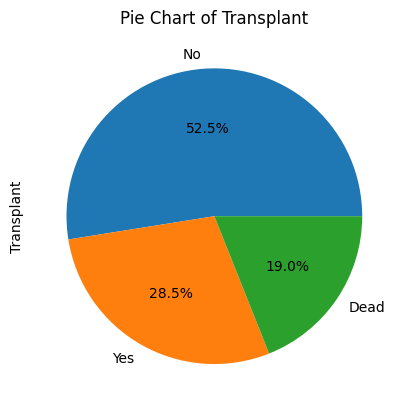

In [16]:
df['Transplant'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Transplant');

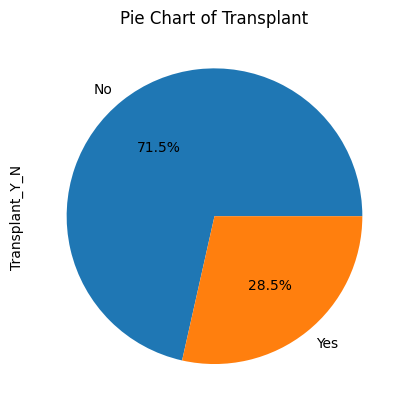

In [17]:
df['Transplant_Y_N'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Transplant');

In [18]:
# Transplant 특성 제거
df.drop('Transplant', axis=1, inplace=True)

# 이식하지 않은 환자 데이터 제거
df = df.loc[df['Transplant_Y_N'] == 'Yes']

# 확인
df['Transplant_Y_N'].value_counts()

Yes    13732
Name: Transplant_Y_N, dtype: int64

In [19]:
# 인덱스 재설정 
df = df.reset_index(drop=True)

# 확인 
df.head()

,Id,date,age_at_list_registration,age_cat,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,...,date_acutal,death,Time_death,Transplant_Y_N,X36MthsTx,Time_Tx,priorization,removed_list,time,event
0,19,2014-08-28,68,Maior.60,14,Branca,M,Diabetes,0,B,...,43307,No,48,Yes,1,4.53,No,No,136,1
1,21,2011-07-05,62,Maior.60,12,Branca,M,others,1,AB,...,43307,Yes,64,Yes,1,8.93,No,No,268,1
2,22,2005-06-28,47,18.a.60,1,Branca,M,others,1,O,...,43307,No,159,Yes,0,44.83,No,No,1345,1
3,40,2006-10-03,65,Maior.60,7,Branca,M,others,1,A,...,43307,Yes,46,Yes,0,42.77,No,No,1283,1
4,41,2012-07-04,33,18.a.60,12,Parda,F,GNS,1,A,...,43307,No,74,Yes,1,15.47,No,No,464,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13732 entries, 0 to 13731
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          13732 non-null  int64         
 1   date                        13732 non-null  datetime64[ns]
 2   age_at_list_registration    13732 non-null  int64         
 3   age_cat                     13732 non-null  object        
 4   time_on_Dialysis            13732 non-null  int64         
 5   race                        13732 non-null  object        
 6   sex                         13732 non-null  object        
 7   underline_disease           13732 non-null  object        
 8   diabetes                    13732 non-null  int64         
 9   Blood_type                  13732 non-null  object        
 10  number_transfusion          13732 non-null  int64         
 11  gestation                   13732 non-null  object    

### **💡 분포 확인 및 이상치 처리/불필요한 특성 정리**<br>
- 결측치가 절반 이상이 되는 특성 
- 같은 내용의 데이터가 타입 및 단위가 다르게 여러 개의 특성을 지닌 경우
- 범주형 데이터 중 한쪽으로 너무 치우쳐진 경우
- 데이터 설명/이해가 안되는 특성
- 불필요하다고(타겟과 상관관계가 없다고) 사료되는 특성
- 포르투칼어로 되어있는 범주형 데이터 -> 영어로 변환

In [21]:
# 제거될 특성을 아래와 같은 리스트에 append될 것이다. 
will_be_removed =  []

#### gestation

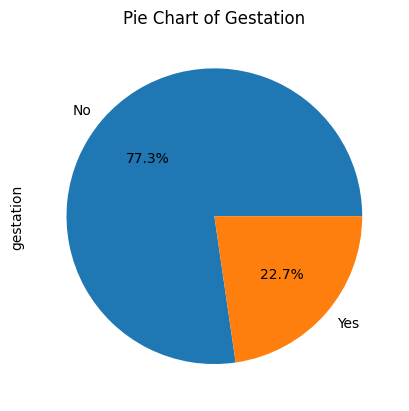

In [22]:
# gestation 특성 확인
df['gestation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Gestation');

#### priorization

<Axes: ylabel='priorization'>

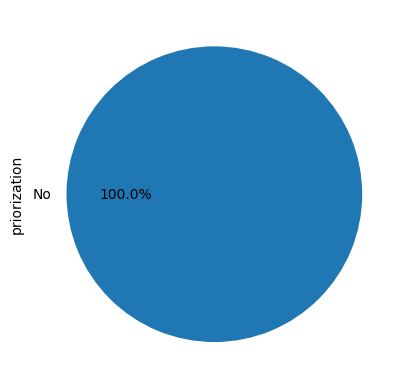

In [23]:
# priorization 특성 확인
df['priorization'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [24]:
# 범주형 데이터의 범위가 하나 뿐인 특성은 제거한다. 
# 모든 환자가 같은 데이터를 가지고 있으므로 실효성이 없다고 사료된다. 
will_be_removed.append('priorization')

#### date_acutal

In [25]:
# date_acutal 확인
print(df['date_acutal'].value_counts())

43307    13732
Name: date_acutal, dtype: int64


In [26]:
# 대기명단 등록일을 나타내는 date 특성이 따로 존재하므로 해당 특성을 제거한다. 
will_be_removed.append('date_acutal')

#### X36MthsTx

In [27]:
# X36MthsTx 확인
df[['X36MthsTx']]

,X36MthsTx
0,1
1,1
2,0
3,0
4,1
...,...
13727,0
13728,0
13729,0
13730,1


In [28]:
# X36MthsTx 특성은 어떤 것을 의미하는지 알지 못해 제거한다. 
will_be_removed.append('X36MthsTx')

#### time & Time_Tx

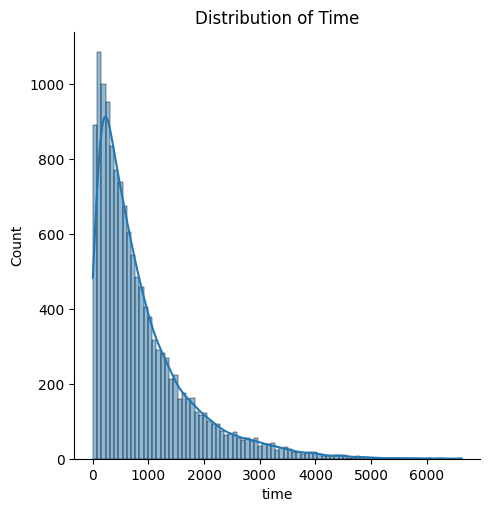

In [29]:
# time과 Time_Tx 특성 분포 확인 
sns.displot(x=df['time'], kde=True)
plt.title('Distribution of Time');

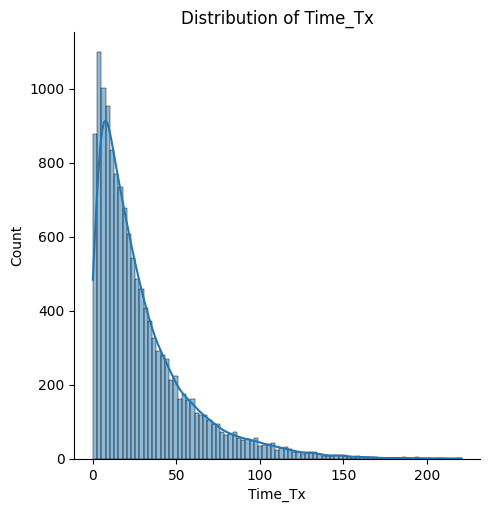

In [30]:
sns.displot(x=df['Time_Tx'], kde=True)
plt.title('Distribution of Time_Tx');

In [31]:
# time과 Time_Tx 특성은 같은 분포를 띄며, 데이터 개수도 똑같다. 
# 그저 단위가 다를 뿐이다. time은 일수 기준이고, Time_Tx는 월수 기준이다. 
# 작은 범위의 단위를 선택할 것이므로 time을 제거한다. 
will_be_removed.append('time')

In [32]:
# Time_Tx 데이터 타입 변환(float -> int)
df['Time_Tx'] = df['Time_Tx'].round(0).astype(int)

# 확인 
df['Time_Tx'].value_counts()

4      453
5      451
2      432
6      424
8      400
      ... 
187      1
167      1
176      1
179      1
157      1
Name: Time_Tx, Length: 185, dtype: int64

#### removed_list & patient_still_on_list & Id & race & subregion

In [33]:
# removed_list와 patient_still_on_list는 이식 대기 중인 환자를 나타내기 위한 특성들로 
# 우리는 수여자 데이터만 사용할 것이다. 불필요한 특성들은 제거한다. 
will_be_removed.extend(['removed_list', 'patient_still_on_list'])

In [34]:
# Id 특성은 환자고유번호를 나타낸다. 
# 현재 찾고자 하는 타겟은 이식한 환자의 생존여부 및 생존율이므로
# 환자고유번호는 불필요한 특성이다. 제거한다. 
will_be_removed.append('Id')

# 인종을 나타내틑 race 특성과 지역을 나타내틑 subregion도 불필요한 데이터이므로 제거한다. 
will_be_removed.extend(['race', 'subregion'])

#### HLA frequencies

In [35]:
# HLA frequencies 특성은  
# 공여자와 수여자 간의 조직적합성을 판단하는 특성들이 존재하므로 
# 해당 특성들은 제거한다.
frequencies_hla = ['calculated_frequency_DR.f1', 'calculated_frequency_DR.f2','calculated_frequency_DR.f', 'calculated_frequency_B.f1', 'calculated_frequency_B.f2','calculated_frequency_B.f','calculated_frequency_A.f1','calculated_frequency_A.f2', 'calculated_frequency_A.f']
print(df[['calculated_frequency_DR.f1']])
will_be_removed.extend(frequencies_hla)

       calculated_frequency_DR.f1
0                            0.19
1                            0.23
2                            0.23
3                            0.22
4                            0.12
...                           ...
13727                        0.23
13728                        0.23
13729                        0.04
13730                        0.22
13731                        0.23

[13732 rows x 1 columns]


#### age & age_cat

In [36]:
# 수여자의 정확한 나이를 확인하기 보다는 
# 나이를 범주형 데이터로 확인하는 것이 편할 것이라 사료되어  
# age 특성을 제거하고 age_cat은 영어로 변환한다. 
print('<age>')
print(df.age_at_list_registration)
print()
print('<age_cat>')
print(df.age_cat)

<age>
0        68
1        62
2        47
3        65
4        33
         ..
13727    36
13728    67
13729    58
13730    56
13731    47
Name: age_at_list_registration, Length: 13732, dtype: int64

<age_cat>
0        Maior.60
1        Maior.60
2         18.a.60
3        Maior.60
4         18.a.60
           ...   
13727     18.a.60
13728    Maior.60
13729     18.a.60
13730     18.a.60
13731     18.a.60
Name: age_cat, Length: 13732, dtype: object


In [37]:
# 기존 범위 확인
print(df['age_cat'].value_counts())

# 범위 이름 재설정
df['age_cat'].replace(to_replace='18.a.60', value='From18to60', inplace=True)
df['age_cat'].replace(to_replace='Maior.60', value='Over60', inplace=True)
df['age_cat'].replace(to_replace='Menor.18', value='Below18', inplace=True)

18.a.60     10511
Maior.60     2119
Menor.18     1102
Name: age_cat, dtype: int64


In [38]:
# 확인
df['age_cat'].value_counts()

From18to60    10511
Over60         2119
Below18        1102
Name: age_cat, dtype: int64

In [39]:
# age_at_list_registration 제거
will_be_removed.append('age_at_list_registration')

#### cPCA & cPCA_cat

In [40]:
# 패널반응항체 검사 결과를 나타내는 cPRA_cat(범주형)와 cPRA(수치형) 중 수치형을 제거하고
# 범주형 범위를 영어로 변환한다. 

# cPRA 제거
will_be_removed.append('cPRA')

# 범주형 범위 확인 
print(df['cPRA_cat'].value_counts())

# 범위 이름 재설정
df['cPRA_cat'].replace(to_replace='Entre_0_50', value='0to50', inplace=True)
df['cPRA_cat'].replace(to_replace='Entre_50_80', value='From50to80', inplace=True)
df['cPRA_cat'].replace(to_replace='Maior_80', value='Over80', inplace=True)

Zero           10823
Entre_0_50      1897
Entre_50_80      617
Maior_80         395
Name: cPRA_cat, dtype: int64


In [41]:
# 확인
df['cPRA_cat'].value_counts()

Zero          10823
0to50          1897
From50to80      617
Over80          395
Name: cPRA_cat, dtype: int64

#### Time_death

In [42]:
# Time_death 제거
# 사망 여부를 알 수 있는 `death`이 필요할 뿐, 사망 시간을 나타내는 Time_death은 불필요하다. 
will_be_removed.append('Time_death')

#### anti_HCV & anti_HBc

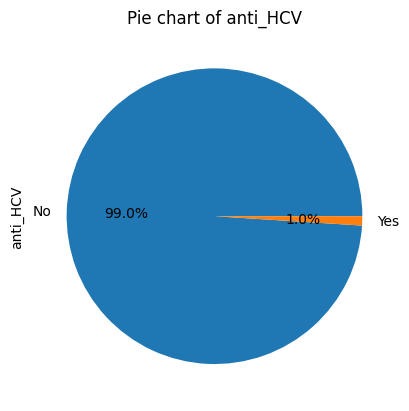

In [43]:
# anti_HCV 분포 확인
df['anti_HCV'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie chart of anti_HCV');

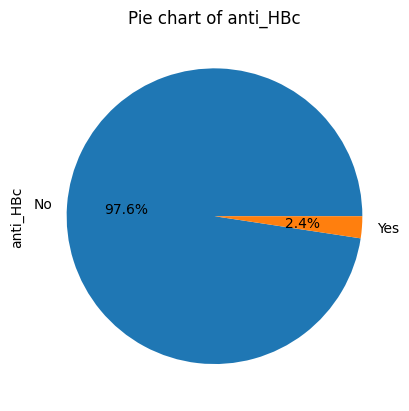

In [44]:
# anti_HBc 분포 확인
df['anti_HBc'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie chart of anti_HBc');

In [45]:
# anti_HCV는 C형 간염 바이러스 보유 여부를 나타내는 특성이고,
# anti_HBc는 B형 간염 바이러스 보유 여부를 나타낸다. 
# 일반적인 사람은 바이러스를 보유하고 있지 않기 때문에 
# 범주형 데이터의 범위 비율이 한쪽으로 쏠려있다. 
# 타겟에 큰 영향을 주는 특성이 아니라고 사료되므로 제거한다. 
will_be_removed.extend(['anti_HCV', 'anti_HBc'])

#### time_on_Dialysis

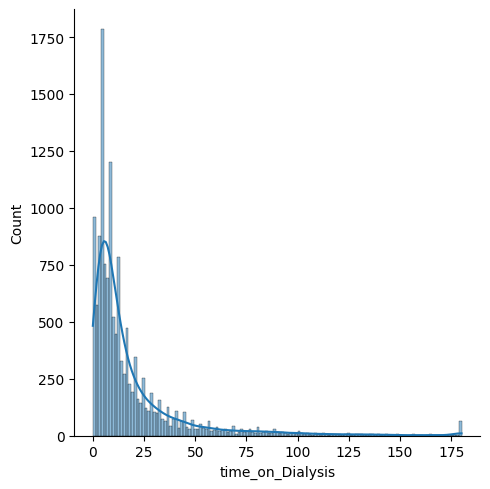

In [46]:
# time_on_Dialysis 투석기간 분포 확인
sns.displot(x=df['time_on_Dialysis'], kde=True);
# right-skewed -> normal distribution(정규화 작업 필요)

In [47]:
df.query('time_on_Dialysis == 0')

,Id,date,age_at_list_registration,age_cat,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,...,date_acutal,death,Time_death,Transplant_Y_N,X36MthsTx,Time_Tx,priorization,removed_list,time,event
290,1321,2000-09-15,42,From18to60,0,Branca,M,HUS,1,A,...,43307,Yes,161,Yes,0,59,No,No,1771,1
399,1827,2014-12-03,44,From18to60,0,Branca,M,others,1,O,...,43307,No,44,Yes,1,10,No,No,302,1
412,1883,2007-04-04,58,From18to60,0,Branca,M,Diabetes,0,A,...,43307,No,138,Yes,1,22,No,No,671,1
716,3284,2000-11-08,43,From18to60,0,Branca,F,PN,1,O,...,43307,No,216,Yes,0,66,No,No,1993,1
1026,4852,2015-11-25,65,Over60,0,Branca,M,Diabetes,0,A,...,43307,No,32,Yes,1,2,No,No,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,54210,2008-03-20,39,From18to60,0,Negra,M,HUS,1,O,...,43307,No,126,Yes,0,101,No,No,3035,1
13186,54847,2009-10-05,51,From18to60,0,Branca,F,others,1,O,...,43307,No,107,Yes,1,25,No,No,752,1
13258,55144,2002-08-23,51,From18to60,0,Branca,F,HUS,1,O,...,43307,Yes,87,Yes,1,10,No,No,314,1
13679,56678,2000-09-29,71,Over60,0,Branca,F,GNS,1,A,...,43307,No,217,Yes,1,16,No,No,495,1


In [48]:
# 신장 이식이 필요한 정도의 환자들은 반드시 한번 이상의 투석을 해야한다. 
# 따라서 투석기간이 0인 환자들은 1로 대체한다. 
df['time_on_Dialysis'] = df['time_on_Dialysis'].replace(0, 1)

# 변경 확인
df.loc[df['time_on_Dialysis'] == 0]

,Id,date,age_at_list_registration,age_cat,time_on_Dialysis,race,sex,underline_disease,diabetes,Blood_type,...,date_acutal,death,Time_death,Transplant_Y_N,X36MthsTx,Time_Tx,priorization,removed_list,time,event


#### A_00 & B_00 & DR_00

In [49]:
# A_00 확인
print(df['A_00'].value_counts(),'\n')
# B_00 확인
print(df['B_00'].value_counts(),'\n')
# DR_00 확인
print(df['DR_00'].value_counts(),'\n')

heterozygote    12492
homozygote       1240
Name: A_00, dtype: int64 

heterozygote    13099
homozygote        633
Name: B_00, dtype: int64 

heterozygote    13199
homozygote        533
Name: DR_00, dtype: int64 



#### diabetes & underline_disease

In [50]:
# underline_disease 확인
df['underline_disease'].value_counts()

others      4931
HUS         3451
GNS         2778
Diabetes    2221
PN           351
Name: underline_disease, dtype: int64

In [51]:
# diabetes은 당뇨병의 유무를 나타내는 특성이다.
# 해당 내용은 위의 underline_disease 특성에서도 확인 가능하므로 제거한다.
will_be_removed.append('diabetes')

#### event

In [52]:
# event 확인
print(df['event'].value_counts())

# event는 어떤 내용을 담고 있는 것인지 알 수 없어 제거한다.
will_be_removed.append('event')

1    13732
Name: event, dtype: int64


#### Transplant_Y_N

In [53]:
# Transplant_Y_N 확인 
print(df['Transplant_Y_N'].value_counts())

# 신장 이식을 시행한 환자의 데이터만 사용하여 타겟을 설정하였기 때문에
# 신장 이식 여부를 나타내는 특성에 `Yes`만 있다. 
# 즉,모든 환자가 같은 데이터를 가지고 있으므로 제거해도 무방하다
will_be_removed.append('Transplant_Y_N')

Yes    13732
Name: Transplant_Y_N, dtype: int64


#### date 

In [54]:
# date 특성 제거
will_be_removed.append('date')

#### 제거될 특성 확인 및 제거

In [55]:
will_be_removed

['priorization',
 'date_acutal',
 'X36MthsTx',
 'time',
 'removed_list',
 'patient_still_on_list',
 'Id',
 'race',
 'subregion',
 'calculated_frequency_DR.f1',
 'calculated_frequency_DR.f2',
 'calculated_frequency_DR.f',
 'calculated_frequency_B.f1',
 'calculated_frequency_B.f2',
 'calculated_frequency_B.f',
 'calculated_frequency_A.f1',
 'calculated_frequency_A.f2',
 'calculated_frequency_A.f',
 'age_at_list_registration',
 'cPRA',
 'Time_death',
 'anti_HCV',
 'anti_HBc',
 'diabetes',
 'event',
 'Transplant_Y_N',
 'date']

In [56]:
# 마무리 : 불필요한 특성들 제거하기
df_cleaned = df.drop(columns=will_be_removed)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13732 entries, 0 to 13731
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age_cat                  13732 non-null  object
 1   time_on_Dialysis         13732 non-null  int64 
 2   sex                      13732 non-null  object
 3   underline_disease        13732 non-null  object
 4   Blood_type               13732 non-null  object
 5   number_transfusion       13732 non-null  int64 
 6   gestation                13732 non-null  object
 7   prior_transplant         13732 non-null  object
 8   number_prior_transplant  13732 non-null  int64 
 9   cPRA_cat                 13732 non-null  object
 10  HLA_A1                   13732 non-null  int64 
 11  HLA_A2                   13732 non-null  int64 
 12  HLA_B1                   13732 non-null  int64 
 13  HLA_B2                   13732 non-null  int64 
 14  HLA_DR1                  13732 non-nul

### **💡 특성명 재설정**
- 보다 편리한 이해를 돕기 위해 특성명을 가독성 높게 재설정한다. 
>- `age_cat` : 수여자 나이 (범주형)
  - `dialysis_duration` : 투석 기간 (월 기준)
  - `gender` : 성별
  - `underlying_disease` : 기저 질환
    - `HUS(Hemolytic Uremic Syndrome)` : 용혈요도증후군
    - `GNS(Glumerulo-Nephrotic Syndrome)` : 신장증후군
    - `PN(Pyelonephritis)` : 신우신염 
    - `Diabetes` : 당뇨병
  - `blood_type` : 혈액형
  - `transfusions` : 수혈 횟수
  - `gestation` : 임신 여부
  - `number_prior_transplant` : 과거 이식 실행 여부
  - `cPRA_cat` : 패널반응항체 검사 결과(범주형)
  - `HLA_A1`, `HLA_A2`, `HLA_B1`, `HLA_B2`, `HLA_DR1`,  `HLA_DR2`
    - HLA(인체조직적합항원) 유전자좌(유전자가 염색체 혹은   염색치 지도상에 차지하는 위치)를 나타냄
    - e.g. HLA_A1 특성의 값이 `2`라면 HLA-A에 A2 항원이   존재한다는 것을 의미한다. 
  - `DR_00`, `B_00`, `A_00` 
    - 각각의 항원에 위치한 항원 개수를 범주형 데이터로  나타냄
    - `homozygote` : 한 가지의 항원만 존재 - 동형 접합체
    - `heterozygote` : 두 가지 항원 존재 - 이형 접합체
  - `anti_HBc` : B형 간염바이러스 항체 보유 여부
  - `anti_HCV` : C형 간염바이러스 항체 보유 여부
  - `death` : 사망 여부
  - `transplanted` : 현재 이식 실행 여부
  - `duration` : 대기 기간(월 기준)

In [57]:
# 특성명 재설정
df_cleaned.rename(columns={'underline_disease':'underlying_disease','time_on_Dialysis':'dialysis_duration','number_transfusion':'transfusions','\n'
                   'Blood_type':'blood_type','Time_Tx':'duration','Transplant_Y_N':'transplanted','sex':'gender'}, inplace=True)

# 확인
df_cleaned.columns

Index(['age_cat', 'dialysis_duration', 'gender', 'underlying_disease',
       'Blood_type', 'transfusions', 'gestation', 'prior_transplant',
       'number_prior_transplant', 'cPRA_cat', 'HLA_A1', 'HLA_A2', 'HLA_B1',
       'HLA_B2', 'HLA_DR1', 'HLA_DR2', 'DR_00', 'B_00', 'A_00', 'death',
       'duration'],
      dtype='object')

#### dialysis_duration 범주형 데이터 생성 및 로그 변환

In [58]:
df_cleaned.describe()[['dialysis_duration']]

,dialysis_duration
count,13732.000000
mean,18.547553
std,25.784757
min,1.000000
25%,5.000000
50%,10.000000
75%,21.000000
max,180.000000


In [59]:
df_cleaned['dialysis_duration'].value_counts()

1      962
4      938
3      877
5      846
6      753
      ... 
156      1
167      1
151      1
173      1
179      1
Name: dialysis_duration, Length: 173, dtype: int64

In [60]:
df_cleaned['dialysis_duration_cat'] = 0
df_cleaned['dialysis_duration_cat'] = pd.cut(df_cleaned.dialysis_duration, bins=[0,45, 90, 135, 180], 
                                             labels=['below45', 'From46to90', 'From91to135', 'Over136'])

# 확인
df_cleaned['dialysis_duration_cat'].value_counts()

below45        12439
From46to90       887
From91to135      263
Over136          143
Name: dialysis_duration_cat, dtype: int64

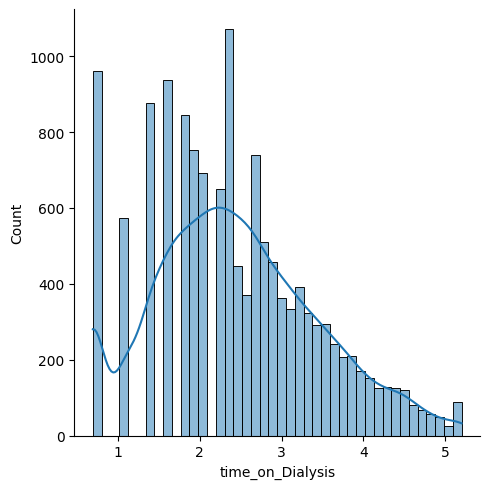

In [61]:
# 로그 변환
df['time_on_Dialysis'] = np.log1p(df['time_on_Dialysis'])

# 확인
sns.displot(x=df['time_on_Dialysis'], kde=True);

### **💡 상관계수 확인**<br>


In [62]:
df_cleaned.corr()

,dialysis_duration,transfusions,number_prior_transplant,HLA_A1,HLA_A2,HLA_B1,HLA_B2,HLA_DR1,HLA_DR2,duration
dialysis_duration,1.000000,0.182225,0.405599,0.007897,0.019726,0.011107,0.002934,0.011027,0.004087,-0.082288
transfusions,0.182225,1.000000,0.105972,-0.009529,0.005434,-0.008153,-0.019767,0.018558,-0.020258,-0.077561
number_prior_transplant,0.405599,0.105972,1.000000,0.003588,0.013464,-0.007356,-0.018716,-0.014508,-0.015445,-0.007076
HLA_A1,0.007897,-0.009529,0.003588,1.000000,0.269556,0.092791,-0.043583,0.094063,-0.049747,0.012075
HLA_A2,0.019726,0.005434,0.013464,0.269556,1.000000,-0.029356,0.067601,-0.020876,0.073555,0.029945
HLA_B1,0.011107,-0.008153,-0.007356,0.092791,-0.029356,1.000000,0.216678,0.128109,-0.045026,0.012718
HLA_B2,0.002934,-0.019767,-0.018716,-0.043583,0.067601,0.216678,1.000000,0.006761,0.111512,0.000028
HLA_DR1,0.011027,0.018558,-0.014508,0.094063,-0.020876,0.128109,0.006761,1.000000,0.254165,0.013535
HLA_DR2,0.004087,-0.020258,-0.015445,-0.049747,0.073555,-0.045026,0.111512,0.254165,1.000000,-0.011243
duration,-0.082288,-0.077561,-0.007076,0.012075,0.029945,0.012718,0.000028,0.013535,-0.011243,1.000000


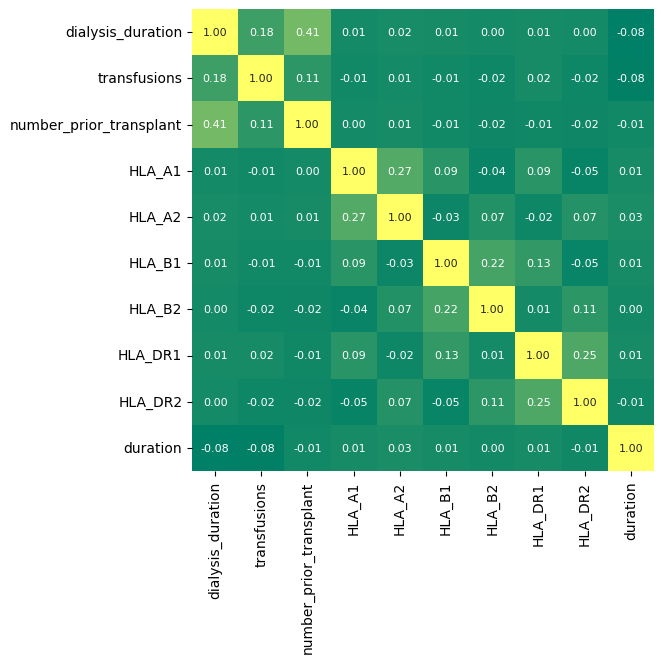

In [63]:
# 상관관계 그래프 확인
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(),
            annot=True, 
            cmap='summer',
            fmt='.2f',
            cbar=False,
            square=True,
            annot_kws={'size':8})
plt.show()

### **💡 카디널리티 확인**<br>


In [64]:
df_cleaned.nunique()

age_cat                      3
dialysis_duration          173
gender                       2
underlying_disease           5
Blood_type                   4
transfusions                 4
gestation                    2
prior_transplant             2
number_prior_transplant      6
cPRA_cat                     4
HLA_A1                      21
HLA_A2                      21
HLA_B1                      35
HLA_B2                      36
HLA_DR1                     14
HLA_DR2                     14
DR_00                        2
B_00                         2
A_00                         2
death                        2
duration                   185
dialysis_duration_cat        4
dtype: int64

### 3) 시각화
- 가설과 관련된 시각화 결과 제시
- **`투석기간이 짧은 경우 신장 이식 후의 생존율이 높아질 것이다.`**

#### 투석기간(dialysis_duration)에 따른 사망 여부(death)

In [65]:
# 투석기간에 따른 사망 여부의 빈도수 확인
pd.crosstab(df_cleaned['dialysis_duration_cat'], df_cleaned['death'], margins=True)

death,No,Yes,All
dialysis_duration_cat,,,
below45,10245,2194,12439
From46to90,720,167,887
From91to135,216,47,263
Over136,122,21,143
All,11303,2429,13732


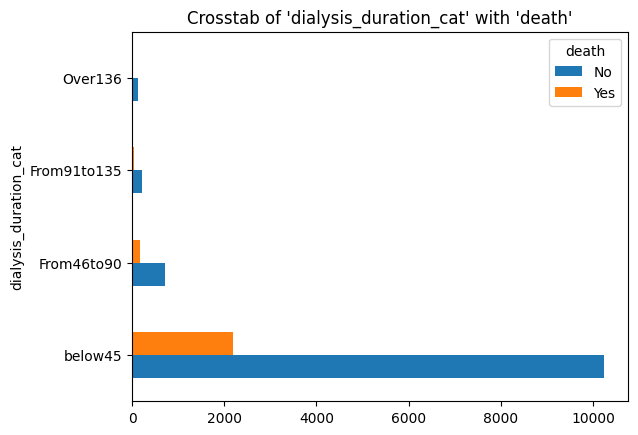

In [66]:
# 그래프 확인
ct = pd.crosstab(df_cleaned['dialysis_duration_cat'],df_cleaned['death'])
ct.plot(kind="barh")
plt.title("Crosstab of 'dialysis_duration_cat' with 'death'");

#### 기저질환(underlying_disease)에 따른 사망여부(death)

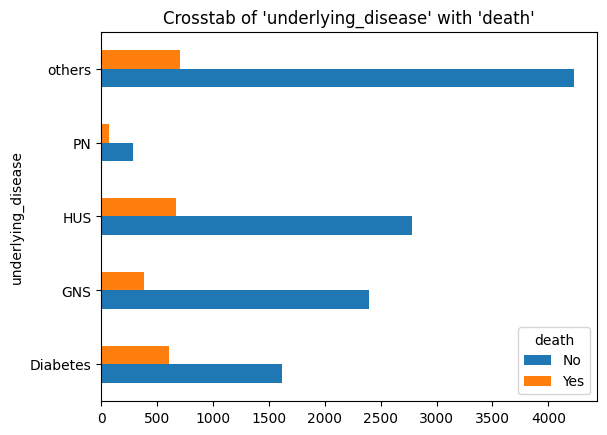

In [67]:
# 기저질환에 따른 사망 여부 - 그래프 확인
ct = pd.crosstab(df_cleaned['underlying_disease'],df_cleaned['death'])
ct.plot(kind="barh")
plt.title("Crosstab of 'underlying_disease' with 'death'");

#### 나이(age_cat)에 따른 사망여부(death)

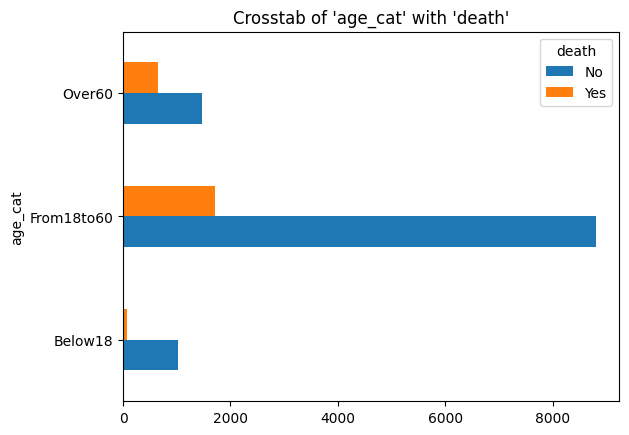

In [68]:
# 나이에 따른 사망 여부 - 그래프 확인
ct = pd.crosstab(df_cleaned['age_cat'],df_cleaned['death'])
ct.plot(kind="barh")
plt.title("Crosstab of 'age_cat' with 'death'");

#### 과거 장기이식 여부(prior_transplant)에 따른 사망 여부(death)

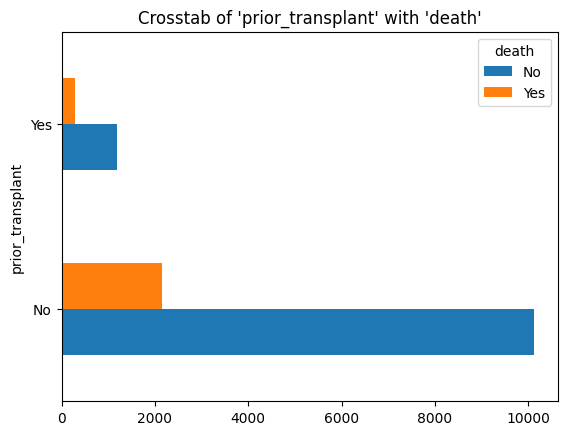

In [69]:
# 과거 장기이식 여부에 따른 사망 여부 - 그래프 확인
ct = pd.crosstab(df_cleaned['prior_transplant'],df_cleaned['death'])
ct.plot(kind="barh")
plt.title("Crosstab of 'prior_transplant' with 'death'");

#### 임신여부(gestation)에 따른 사망 여부(death)

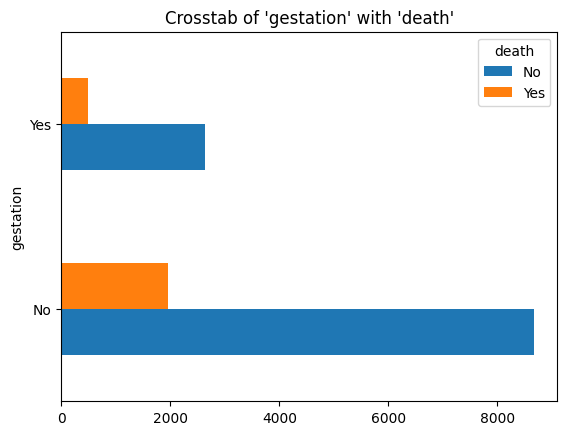

In [70]:
# 임신여부에 따른 사망 여부 - 그래프 확인
ct = pd.crosstab(df_cleaned['gestation'],df_cleaned['death'])
ct.plot(kind="barh")
plt.title("Crosstab of 'gestation' with 'death'");

#### 수혈 횟수(transfusions)에 따른 사망여부(death)

In [71]:
# 수혈 횟수 특성 빈도수 확인
df_cleaned['transfusions'].value_counts().to_frame().style.background_gradient(cmap='summer')

,transfusions
0,8895
1,4198
2,437
3,202


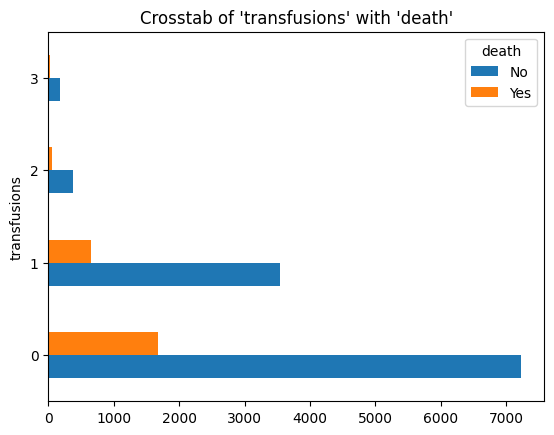

In [72]:
# 수혈 횟수에 따른 사망 여부 - 그래프 확인
ct = pd.crosstab(df_cleaned['transfusions'],df_cleaned['death'])
ct.plot(kind="barh")
plt.title("Crosstab of 'transfusions' with 'death'");

> **🔎 전처리 후의 체크 질문**
1. Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?
  - 사용할 수 있는 특성 이상의 특성으로 포함하고 있는지 확인 (상관계수가 너무 높은 피쳐 drop)
  -  스케일링 및 인코딩 과정 유의 (pipeline 활용)
2. 특성과 타겟의 관계 및 가설을 충분히 설명할 수 있는 시각화 결과를 제시했나요?
3. 전처리 과정에 대한 근거와 설명이 있나요?

## **2. Modeling**

### (1) 데이터 준비<br>
  - 특성과 타겟 분리
  - 가변수화(인코딩)
  - 학습/검증/테스트 데이터셋 분리
  - 스케일링
  - 기준모델 생성

In [73]:
df_cleaned.head().T

,0,1,2,3,4
age_cat,Over60,Over60,From18to60,Over60,From18to60
dialysis_duration,14,12,1,7,12
gender,M,M,M,M,F
underlying_disease,Diabetes,others,others,others,GNS
Blood_type,B,AB,O,A,A
transfusions,1,0,0,0,0
gestation,No,No,No,No,No
prior_transplant,No,No,No,No,No
number_prior_transplant,0,0,0,0,0
cPRA_cat,Zero,Zero,Zero,Zero,Zero


No     0.823114
Yes    0.176886
Name: death, dtype: float64
No     11303
Yes     2429
Name: death, dtype: int64


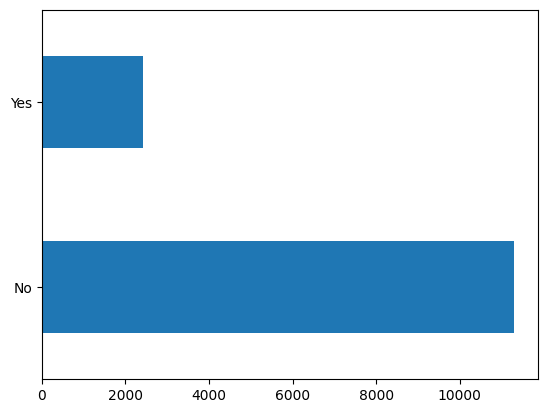

In [74]:
print(df_cleaned['death'].value_counts(normalize=True))
print(df_cleaned['death'].value_counts())

df_cleaned['death'].value_counts().plot(kind='barh');

#### 데이터 분리

In [75]:
# 함수 선언
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder,OrdinalEncoder

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
# 함수 선언
from sklearn.model_selection import train_test_split

# 타겟값 문자형 -> 수치형 변환
df_cleaned['death'] = df_cleaned['death'].replace({'No':0, 'Yes':1})

# 특성과 타겟 분리
target = 'death'
x = df_cleaned.drop(target, axis=1)
y = df_cleaned.loc[:, target]

# 학습/검증/테스트 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 확인
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8788, 21)
x_val shape: (2197, 21)
x_test shape: (2747, 21)


#### 기준 모델 

In [77]:
# 기준 모델 생성(최빈 클래스로 예측 수행)
base_major = y_train.mode()[0]
y_pred_base = [base_major]*len(y_train)

# 정확도 확인
from sklearn.metrics import accuracy_score
print('base_model accuracy:', accuracy_score(y_train, y_pred_base).round(2))

base_model accuracy: 0.82


In [78]:
# 검증 세트 정확도 확인
y_pred_base_val = [base_major]*len(y_val)
print('base_model_val accuracy:', accuracy_score(y_val, y_pred_base_val).round(2))

base_model_val accuracy: 0.82


        Predicted 0  Predicted 1
True 0         1808            0
True1           389            0 



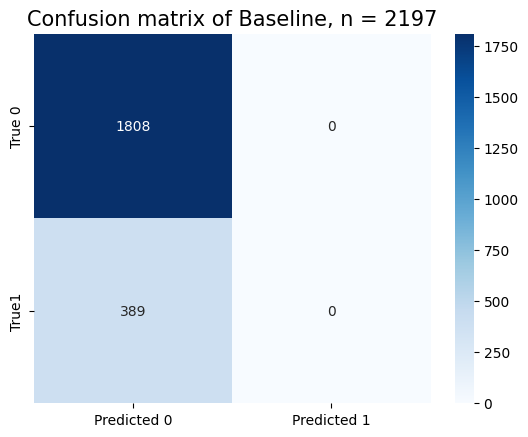

In [79]:
y_true0 = y_val.value_counts()[0]
y_true1 = y_val.value_counts()[1]
fn = len(y_pred_base_val) - y_true0
base = pd.DataFrame(index = ['True 0', 'True1'], data = {'Predicted 0':[y_true0, fn], 'Predicted 1':[0,0]})
print(base,'\n')

# fig, ax = plt.subplots()
sns.heatmap(base, cmap=plt.cm.Blues, annot=True,fmt="d")
plt.title(f'Confusion matrix of Baseline, n = {len(y_val)}', fontsize=15)
plt.show()

### (2) 다양한 모델 생성<br>
- Logistic Regression
- RandomForestClassifier
- XGBoost

In [80]:
# LogisticRegression 모델 선언 및 학습
lr_pipe = make_pipeline(OneHotEncoder(),
                        StandardScaler(),
                        LogisticRegression(class_weight='balanced'))
lr_pipe.fit(x_train, y_train)

# 정확도 확인
print('학습 정확도:', lr_pipe.score(x_train, y_train))
print('검증 정확도:', lr_pipe.score(x_val, y_val),'\n')

# 검증 데이터 성능 확인
y_val_lr = lr_pipe.predict(x_val)
print(classification_report(y_val, y_val_lr))

학습 정확도: 0.6376877560309513
검증 정확도: 0.6263086026399636 

              precision    recall  f1-score   support

           0       0.87      0.64      0.74      1808
           1       0.25      0.56      0.35       389

    accuracy                           0.63      2197
   macro avg       0.56      0.60      0.54      2197
weighted avg       0.76      0.63      0.67      2197



In [81]:
# RandomForestClassifier 모델 선언
rf_pipe = make_pipeline(OrdinalEncoder(),
                        StandardScaler(),
                        RandomForestClassifier(class_weight='balanced',random_state=42))
rf_pipe.fit(x_train, y_train)

# 정확도 확인
print('학습 정확도:', rf_pipe.score(x_train, y_train))
print('검증 정확도:', rf_pipe.score(x_val, y_val),'\n')

# 성능 확인
y_val_rf = rf_pipe.predict(x_val)
print(classification_report(y_val, y_val_rf))

학습 정확도: 1.0
검증 정확도: 0.8211197086936732 

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1808
           1       0.25      0.01      0.01       389

    accuracy                           0.82      2197
   macro avg       0.54      0.50      0.46      2197
weighted avg       0.72      0.82      0.74      2197



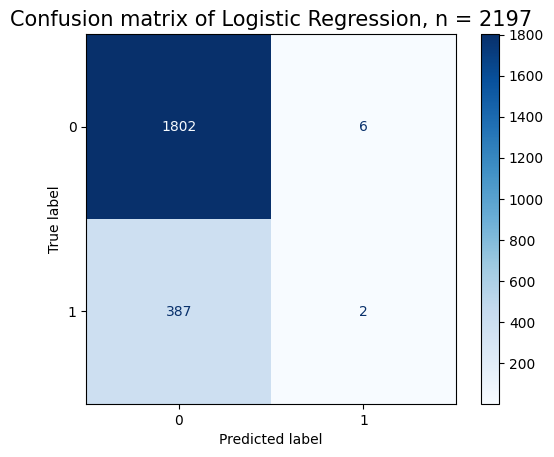

In [82]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(rf_pipe, x_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_val)}', fontsize=15)
plt.show()

In [83]:
# XGBoost 모델 선언
xgb_pipe = make_pipeline(OrdinalEncoder(),
                         StandardScaler(),
                         XGBClassifier(random_state=42))
xgb_pipe.fit(x_train, y_train)

# 정확도 확인
print('학습 정확도:', xgb_pipe.score(x_train, y_train))
print('검증 정확도:', xgb_pipe.score(x_val, y_val),'\n')

# 성능 확인
y_val_xgb = xgb_pipe.predict(x_val)
print(classification_report(y_val, y_val_xgb))

학습 정확도: 0.9307009558488848
검증 정확도: 0.8051888939462903 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1808
           1       0.31      0.08      0.13       389

    accuracy                           0.81      2197
   macro avg       0.57      0.52      0.51      2197
weighted avg       0.74      0.81      0.76      2197



### (3) 성능 튜닝<br>
- 성능이 가장 좋았던 RandomForestClassifier 모델 성능을 튜닝한다. 

#### GridSearchCV

In [86]:
# 모델 선언
rfc_pipe = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestClassifier(
    random_state=42,
    n_jobs=-1, 
    class_weight='balanced',
  ),
)

# 하이퍼파라미터 지정
params = {'randomforestclassifier__n_estimators':[100, 200],
          'randomforestclassifier__max_depth':range(5, 16),}
          # 'randomforestclassifier__min_samples_leaf':[8, 12, 18],
          # 'randomforestclassifier__min_samples_split':[8, 16, 20],
          # 'randomforestclassifier__max_features':['auto','sqrt']}

# 모델 튜닝
model_pipe = GridSearchCV(rfc_pipe,
                          param_grid=params,                         
                          cv=3,
                          verbose=3,
                          scoring='accuracy')

# 학습
model_pipe.fit(x_train, y_train)

Fitting 3 folds for each of 22 candidates, totalling 66 fits
[CV 1/3] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=100;, score=0.683 total time=   2.4s
[CV 2/3] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=100;, score=0.700 total time=   0.5s
[CV 3/3] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=100;, score=0.653 total time=   0.5s
[CV 1/3] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=200;, score=0.683 total time=   0.8s
[CV 2/3] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=200;, score=0.706 total time=   0.8s
[CV 3/3] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=200;, score=0.661 total time=   0.8s
[CV 1/3] END randomforestclassifier__max_depth=6, randomforestclassifier__n_estimators=100;, score=0.691 total time=   0.6s
[CV 2/3] END randomforestclassifier__max_depth=6, randomforestclassifie

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': range(5, 16),
                         'randomforestclassifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=3)

In [87]:
# 최적 파라미터, 예측 최고 성능 확인
print('최적 파라미터:',model_pipe.best_params_)
print('최고 예측 정확도:',model_pipe.best_score_)

최적 파라미터: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__n_estimators': 200}
최고 예측 정확도: 0.8107645835785179


In [89]:
# 정확도 확인
print('검증 정확도:', model_pipe.score(x_val, y_val))

검증 정확도: 0.8083750568957669


In [90]:
# 튜닝된 모델의 검증 데이터 classification score 확인
y_val_pred = model_pipe.predict(x_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1808
           1       0.34      0.09      0.14       389

    accuracy                           0.81      2197
   macro avg       0.59      0.53      0.52      2197
weighted avg       0.74      0.81      0.76      2197



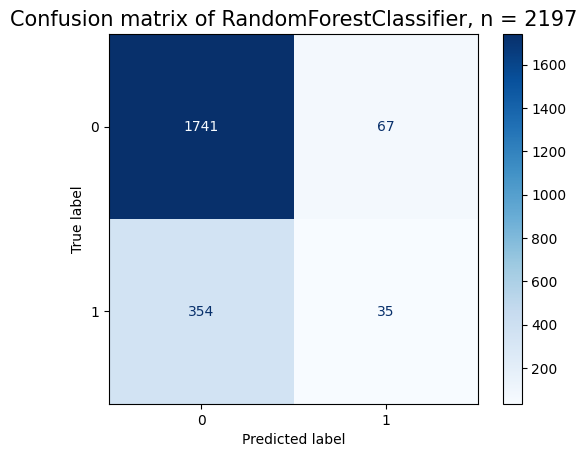

In [91]:
# 튜닝된 모델의 검증 데이터 confusion matrix 확인
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model_pipe, x_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of RandomForestClassifier, n = {len(y_val)}', fontsize=15)
plt.show()

## **3. Model Evaluation**<br>
- 최적으로 튜닝된 모델에 대해 예측과 평가를 실행한다. 

In [ ]:
# 테스트 데이터셋 예측
y_pred = model_pipe.predict(x_test)

In [ ]:
# confusion matrix
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model_pipe, x_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_test)}', fontsize=15)
plt.show()

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

## **4. Model Intrepretation**

### (1) 변수 중요도 비교<br>
- 모델 간 변수 중요도를 비교한다. 

In [ ]:
# 변수 중요도 시각화
tmp = pd.DataFrame()
tmp['feature'] = list(x)
tmp['importance'] = model_pipe.best_estimator_[1].feature_importances_
tmp.sort_values(by='importance', inplace=True)

plt.figure(figsize=(5, 8))
plt.barh(y=tmp['feature'], width=tmp['importance'] )
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

model_rf = model_pipe.named_steps['randomforestclassifier']
importances = pd.Series(model_rf.feature_importances_, x_train.columns)
plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh();

### (2) PDP<br>
- 중요한 특성의 값에 따라 예측값이 어떻게 변하는지 분석한다. 

### (3) ICE plot<br>
- 특정의 특성 값에 따른 예측 영향도를 파악하기 위해 함수를 만들고 그래프를 그린다. 

### (4) Class Imbalance 문제 해결<br>


> **🔎 모델링 및 모델 해석 후의 체크 질문**
1. 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
2. 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
3. 최종 모델과 일반화 성능에 관해 설명하세요.
4. 모델이 예측을 수행하기 위해서 어떤 특성을 활용했나요?

## **5. Business Insight**

### (1) 모델의 confusion matrix

### (2) 비즈니스 가치 matrix